In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import networkx as nx
import scipy as sp
import pickle

In [4]:
source = "snap/facebook_combined.txt"
target = "snap/facebook_combined.pkl"


In [6]:
# Load source and get list of tuple pairs
with open(source, 'r') as f:
    data = f.readlines()
    data = [x.strip().split() for x in data]
    data = [(int(x[0]), int(x[1])) for x in data]

n = max(list(map(lambda x: max(x[0], x[1]), data)))

# Create graph
G = nx.Graph()

# Add every tuple pair as an edge
for edge in data:
    G.add_edge(edge[0], edge[1])

print("Number of nodes: ", G.number_of_nodes())
print("Number of edges: ", G.number_of_edges())

# Convert to csc matrix
A = nx.adjacency_matrix(G)
A = A.tocsc()

# Save with pickle
with open(target, 'wb') as f:
    pickle.dump(A, f)

Number of nodes:  4039
Number of edges:  88234


C:\Users\raymo\AppData\Local\Temp\ipykernel_7180\16188105.py:20: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


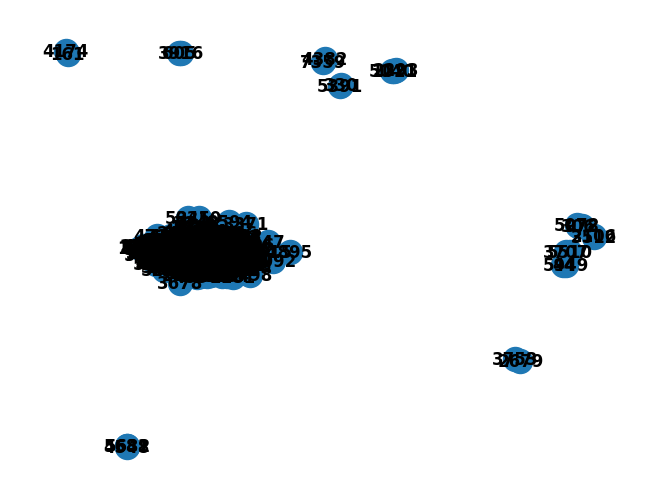

In [27]:
# Draw graph
nx.draw(G, with_labels=True, font_weight='bold')